In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys, os

sys.path.append('/home/user/deep-learning/')
sys.path.append('/home/gbaasch/projects/def-revins/gbaasch/deep-learning')
sys.path.append('../../methods')

In [3]:
import torch
from torch.utils.data import DataLoader
import torch.nn.functional as F
from fastai.metrics import root_mean_squared_error

import matplotlib.pyplot as plt
import pandas as pd

from BlackBoxMethod import ResNet, BasicBlock, RNNRegression
from BuildingDataset import BuildingDataset, DataBunch, get_dls

from training.exp.learner import Learner
from training.exp.runner import prep_run_vanilla, prep_one_cycle
# from datahandlers.exp.basic_databunch import DataBunch, get_dls

# Params for papermill

In [4]:
# this cell is tagged `parameters`
label_idx   = 5 
network     = 'cnn'
run_count   = 1
train_fname = '../../hdf5/train.hdf5'
valid_fname  = '../../hdf5/test.hdf5'

In [5]:
# Parameters
network = "rnn"
label_idx = 1
train_fname = "../../hdf5/train.hdf5"
valid_fname = "../../hdf5/test.hdf5"


In [6]:
save_name = str(label_idx) + '_' + network + '_' + str(run_count)

In [7]:
label_idx, network, run_count, save_name

(1, 'rnn', 1, '1_rnn_1')

# Prep Data

In [8]:
# train_fname, valid_fname = 'train.hdf5', 'test.hdf5'
batch_size = 100

train_ds = BuildingDataset(train_fname, label_idx)
valid_ds = BuildingDataset(valid_fname, label_idx)

len(train_ds), len(valid_ds)

data = DataBunch(*get_dls(train_ds, valid_ds, batch_size))
data.train_ds[0][0].shape

torch.Size([2000, 4])

# Train

In [9]:
use_gpu = True

def run_model(model, opt, db, lr=0.01, epochs=10):
    # prepare basic training
    loss = F.mse_loss
    metrics = [root_mean_squared_error]
    learner = Learner(model, opt, db, loss, use_gpu=use_gpu)
    # run training loop
    run = prep_run_vanilla(metrics, use_cuda=use_gpu)
    run.fit(epochs, learner)
    run.recorder.plot_loss()
    return learner

def run_model_one_cycle(model, opt, db, epochs=10):
    # prepare basic training
    loss = F.mse_loss
    metrics = [root_mean_squared_error]
    learner = Learner(model, opt, db, loss, use_gpu=use_gpu)
    # run training loop
    run = prep_one_cycle(use_cuda=use_gpu, metrics=metrics, min_lr=0.00001, max_lr=0.001)
    run.fit(epochs, learner)
    run.recorder.plot_loss()
    return learner

In [10]:
def resnet(ni, **kwargs):
    model = ResNet(ni, BasicBlock, [3, 4, 6, 3, 3], **kwargs)
    return model

In [11]:
if network == 'cnn':
    model = resnet(ni=4, num_classes=1)
    
elif network == 'rnn':
    model = RNNRegression(ni=4)
    
opt = torch.optim.Adam(model.parameters())

epoch      train loss          valid loss     root_mean_squared_error
0          4678.6672           4610.6791            67.9006       


1           4674.006           4607.2434            67.8735       


2          4667.3832           4592.3773            67.7611       


3          4659.0533           4585.6871            67.7113       


4          4647.6275           4602.0341            67.8259       


5          4631.8325           4534.0038            67.3153       


6          4615.8629           4149.2347            64.3977       


7          4601.8636           4284.2045            65.3955       


8          4593.2551           4356.6422            65.9714       


9          4574.2335           4437.7364            66.6028       


10         4550.6091           4400.7517            66.3046       


11          4518.118           4271.4551            65.3212       


12         4468.0504           4461.3508            66.7447       


13         4398.4448           4196.0296            64.7321       


14         4297.4226           4478.4837            66.9042       


15         4163.8357           4365.9239            66.0314       


16         3980.5793           4136.8105            64.2038       


17         3756.9283           4221.1892            64.8944       


18         3478.7084           3019.3244            54.7929       


19         3151.2088           3425.0247            58.5023       


20         2782.0225           2727.8747            51.8401       


21         2380.7662           2499.2498            49.9232       


22         1966.0857           1537.1615            38.9003       


23         1554.9572           1334.7197            36.3697       


24         1152.8565           1157.4562            33.9239       


25          798.1438            769.3534            27.7167       


26          514.6437            343.8527            18.3096       


27          307.2712            370.3742            18.8608       


28          171.7963            507.3533            22.1852       


29          98.2162             119.7677            10.3004       


30          60.2061             35.3832              5.7749       


31          42.4332             73.1403              8.1606       


32          37.8322              77.408              8.4373       


33          37.4847             40.0062              6.0901       


34          33.1023             44.1591              6.3584       


35          32.2293             47.8497              6.6451       


36           31.653             194.8156            13.6045       


37          31.9977             89.8126              8.4907       


38          31.0481             318.5412            17.3726       


39          31.4371             302.157              14.513       


40          40.5457             238.9788            14.4119       


41          28.3577             30.3062              5.4427       


42          30.1765             45.1165              6.3388       


43           28.955              38.542              5.9534       


44          27.6401             265.7815            14.5963       


45           26.801             48.3763              6.4554       


46          23.5487             54.2119              7.1318       


47          25.6728             288.1877            15.1136       


48          26.9555             35.6053              5.7133       


49          24.1935             31.1338              5.3273       


50          23.6018             29.8466              5.2784       


51          24.0408             22.8062              4.6146       


52          20.3881             30.9745              5.2683       


53          19.4212             36.1021              5.8031       


54          22.8044             52.2039              6.9272       


55          33.0949             415.0359            17.9184       


56          21.0249             183.2206            10.9785       


57          26.2946             64.9257              7.3566       


58          25.1839             20.6582              4.3825       


59          18.7961             27.5181              4.9177       


60          19.6627             28.3749              5.2432       


61          19.0139             39.9966              5.8729       


62          17.8928             28.6958              4.9605       


63          17.2739             41.6369              5.7956       


64          18.2898             29.2133              5.1477       


65          16.5484             29.7764              5.2675       


66          15.8326             17.1486              3.9943       


67          15.5996             73.6782              8.0573       


68          17.0899             243.4508            13.7077       


69          16.7469              69.91               8.0011       


70           18.485             159.6776            11.2821       


71          15.5768             48.0441              6.7205       


72          16.6894             59.0873              7.0962       


73          18.0157              29.055              5.0479       


74          15.1426             49.1383              6.8756       


75          15.8893             725.4784            22.4899       


76          15.3145             83.4899              8.2797       


77          14.4035             53.6047              6.8973       


78          18.0957             108.3265             8.9928       


79          16.3214             32.0527              5.5415       


80          13.5507             14.3299              3.6376       


81           12.817             22.8045              4.4186       


82          13.0144             28.5913              5.2348       


83          14.0207             94.8814              9.0216       


84          15.8541             16.6618              3.7535       


85          14.4648             254.3106            13.7601       


86          13.4608             49.1756              6.8657       


87          13.2373             33.1103              5.4953       


88          12.0227             387.6873            16.3555       


89          16.7565             101.428              8.5022       


90          12.9691             11.7644              3.2803       


91          12.4938             121.6683             9.5061       


92          12.2266             368.6568            16.4597       


93          11.7305              49.134               6.39        


94          12.5362              21.817              4.4877       


95          13.3932             54.2696              7.0579       


96          12.9688             13.3058              3.4476       


97          15.0969             40.5417              5.9486       


98          13.6103             36.5779              5.861        


99          14.0099             45.0486              6.1596       


100         15.1004             43.4051              6.4222       


101         12.9828             107.3434             9.1946       


102          12.629             391.9969            16.9293       


103         13.2733             411.4637            16.8552       


104         12.6742             17.5722              3.9768       


105         12.1398             15.2406              3.8409       


106         11.8957             160.8404            11.0371       


107         11.1914             50.9465              6.2227       


108         16.1319            1795.6718            33.9304       


109         14.4325             65.6601              8.0742       


110         12.8645             39.3754              5.4492       


111         13.4575             39.1661              5.4891       


112         13.1551             178.9283            11.4571       


113         12.5555             111.2428             8.9526       


114         11.1434             12.6438              3.4362       


115         10.0461             10.0108              3.0173       


116          10.332              16.59               3.9418       


117         10.1985             33.1634              5.1908       


118         10.3445             15.1214              3.6455       


119         12.0571             23.2553              4.1889       


120         10.3172             29.0357              5.1325       


121         11.0177             37.0349              5.5834       


122          9.8151             12.8873              3.3223       


123          9.963               41.304              6.0962       


124          9.9746             16.0472              3.6694       


125          9.5063             12.3174              3.2149       


126          9.3961              7.901                2.65        


127         10.1205              9.7604              2.9876       


128          9.3964             59.5632              7.1289       


129          9.0682             26.9907              4.6876       


130          9.2248             21.2748              4.0427       


131          9.6911             10.6958              3.0207       


132          9.4351              8.1933              2.7148       


133          8.8066             37.4986              5.3834       


134          8.4606             14.7601              3.5319       


135          8.3629             13.8276              3.4663       


136          8.4336             20.8415              4.3178       


137          8.3213             10.5977              3.1485       


138          8.6288             17.6856              3.8203       


139          8.3761             15.6118              3.6342       


140          8.6484              6.145               2.3633       


141          8.2254             40.0548              5.7362       


142          7.9303             114.1789             9.3702       


143          8.2726              13.718              3.4865       


144          8.2078             13.0766              3.3447       


145          7.5134              9.1123              2.8363       


146          7.8452              6.7809              2.5008       


147          7.588              11.2161              3.0658       


148          7.6393             10.5092              3.0108       


149          7.5883              5.639               2.2708       


150          8.4225              6.9198              2.5157       


151          7.4521              5.8929              2.3177       


152          7.2179              6.6255              2.489        


153          7.0885              7.741               2.6365       


154          7.4741              7.9075              2.7501       


155          7.127               8.0261              2.5766       


156          7.2348              9.9287              3.0876       


157          7.0505              5.8103              2.3127       


158          7.0598              8.8742              2.7901       


159          6.9306             10.3499              3.0123       


160          7.0704             12.2514              3.2744       


161          6.9516              7.3264              2.6208       


162          6.9852             21.3192              4.1142       


163          6.8991             13.3219              3.319        


164          7.1925              7.1186              2.5944       


165          6.9132              6.8689              2.4882       


166          6.6536              6.5685              2.468        


167          6.4535              6.4364              2.4111       


168          7.0696              5.9713              2.3571       


169          6.8933              6.179               2.3832       


170          6.7515             15.8224              3.6196       


171          6.3241              5.4661              2.2144       


172          6.3345              5.4022              2.2279       


173          6.5565              5.2284              2.1875       


174          6.5812              5.2309              2.2009       


175          6.6292              6.0925              2.3525       


176          6.3312              5.1974              2.201        


177          6.2055              5.6773              2.2949       


178          6.1208              4.8911              2.1106       


179          6.1799             10.9305              2.9934       


180          5.9881              5.1976              2.181        


181          5.8659              4.9472              2.1068       


182          5.8217              5.3328              2.1977       


183          5.9588              4.8783              2.1065       


184          6.2116              4.6609              2.0541       


185          5.9379              4.9337              2.1256       


186          5.8519              5.4926              2.2106       


187          5.8059              4.8107              2.1069       


188          5.8254              4.6254              2.0516       


189          5.7929              4.7339              2.0704       


190          5.6693              4.8499              2.0996       


191          5.8817              5.0169              2.1429       


192          5.9006              4.7291              2.0823       


193          5.654               4.8463              2.0953       


194          5.6234              5.2694              2.1938       


195          5.6971              4.6915              2.0664       


196          5.9403              4.7919              2.085        


197          5.8907              4.6878              2.069        


198          5.3225              5.1335              2.1644       


199          5.7468              4.7297              2.085        


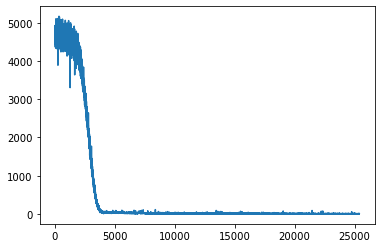

In [12]:
learner = run_model_one_cycle(model, opt, data, epochs=200)

# Predict

In [13]:
# mpath = f'models/cnn_inf' 
mpath = os.path.join('models', save_name)

In [14]:
torch.save(model.state_dict(), mpath) 

In [15]:
state = torch.load(mpath)
if network == 'cnn':
    m = resnet(ni=4, num_classes=1)
    
elif network == 'rnn':
    m = RNNRegression(ni=4)

ml = m.cuda()
ml.load_state_dict(state)
ml.eval();

In [16]:
del model
torch.cuda.empty_cache()

In [17]:
valid_preds = ml(data.valid_dl.x.cuda()) 

### Predict Train

In [18]:
# plt.scatter(data.train_dl.y, train_preds.tolist());
# plt.plot(data.train_dl.y, data.train_dl.y);
# plt.grid()

### Predict Valid

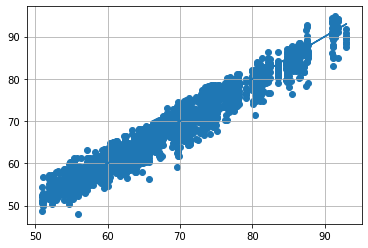

In [19]:
plt.scatter(data.valid_dl.y, valid_preds.tolist());
plt.plot(data.valid_dl.y, data.valid_dl.y);
plt.grid()

# Predict each case

In [20]:
cases_no_infiltration = [
    ('victoria', 'control_concrete', 'False'),
    ('victoria', 'control_concrete', 'True'),
    ('victoria', 'control_wood', 'False'),
    ('victoria', 'control_wood', 'True'),
    ('chicago', 'control_concrete', 'False'),
    ('chicago', 'control_concrete', 'True'),
    ('chicago', 'control_wood', 'False'),
    ('chicago', 'control_wood', 'True'),
    ('victoria', 'control_concrete_inf', 'False'),
    ('victoria', 'control_concrete_inf', 'True'),
    ('victoria', 'control_wood_inf', 'False'),
    ('victoria', 'control_wood_inf', 'True'),
    ('chicago', 'control_concrete_inf', 'False'),
    ('chicago', 'control_concrete_inf', 'True'),
    ('chicago', 'control_wood_inf', 'False'),
    ('chicago', 'control_wood_inf', 'True')
]

In [21]:
def case_string(case):
    case_name = ''
    for c in case:
        case_name += c #+ '\n'
    return case_name

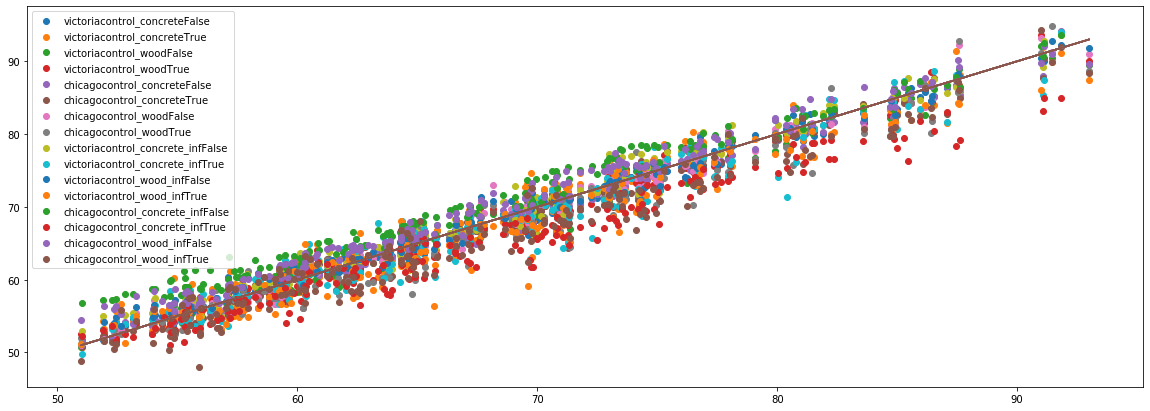

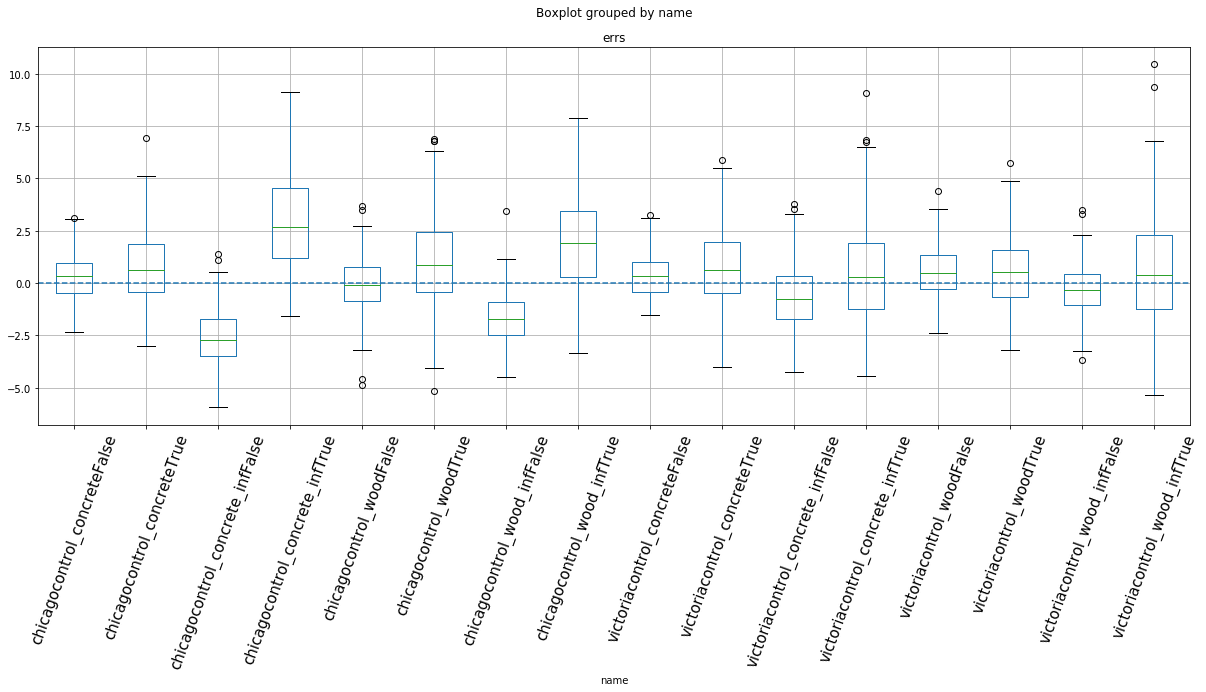

In [22]:
df_errs_all = pd.DataFrame()

plt.figure(figsize=(20,7))

for case in cases_no_infiltration:
    x, y = data.valid_dl.get_by_metadata(list(case))
    preds = ml(x.cuda()) 
    case_name = case_string(case)
    plt.scatter(y, preds.tolist(), label=case_name);
    plt.plot(y, y);
    plt.grid()
#     plt.show()
    df_errors = pd.DataFrame()
    df_errors['errs'] = y.sub(preds.to("cpu")).tolist()
    df_errors['name'] = case_name
    df_errs_all = df_errs_all.append(df_errors)
plt.legend()
plt.show()  

df_errs_all.boxplot(column='errs', by='name', figsize=(20, 7))
plt.axhline(0, 0, 1, label='No Error', linestyle='--')
plt.xticks(rotation=70, fontsize=15);